In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
plt.style.use({'figure.facecolor':'white'})


In [58]:
csv_path = '/Users/y1u0d2/desktop/Lab/result/rdf/rdf_result_atom/test/structure/all/'
output_path = '/Users/y1u0d2/desktop/Lab/Program/python/RDF/rdf_result/pic/all'
files = glob.glob(f'{csv_path}/*')


In [59]:
def plot_rdf_to_one(data,fig,place):
    center_atom = data['center_atom'].unique()[0]
    another_atom = data['another_atom'].unique()[0]

    ax = fig.add_subplot(2,2,place)
    ax.set_title(f"{center_atom}-{another_atom} RDF", fontsize = 14)
    ax.set_xlabel("r(Å)", size = 10, weight = "light")
    ax.set_ylabel(f"g(r) {center_atom}-{another_atom}", size = 10, weight = "light")
    x = list(map(lambda i: round(float(i),2),data.columns[4:]))
    # data.iloc[:,4:] = data.iloc[:,4:] / (4 * np.pi * 0.2)
    mean = data.mean()[1:]
    # mean.to_csv(f'./{center_atom}-{another_atom}_mean.csv')
    std = data.std()[1:]

    converge_mean = mean.iloc[44:].mean()
    ax.hlines([converge_mean], 0, 15, "blue", linestyles='dashed')
    ax.text(0.1,round(float(converge_mean),3),f'{round(float(converge_mean),3)}')
    ax.fill_between(x, mean + std, mean - std, alpha=0.2, color='red')
    ax.plot(x, mean, color='red')
    return fig

<ipython-input-59-144f33fa5012>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data.mean()[1:]
<ipython-input-59-144f33fa5012>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = data.std()[1:]
<ipython-input-59-144f33fa5012>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data.mean()[1:]
<ipython-input-59-144f33fa5012>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will r

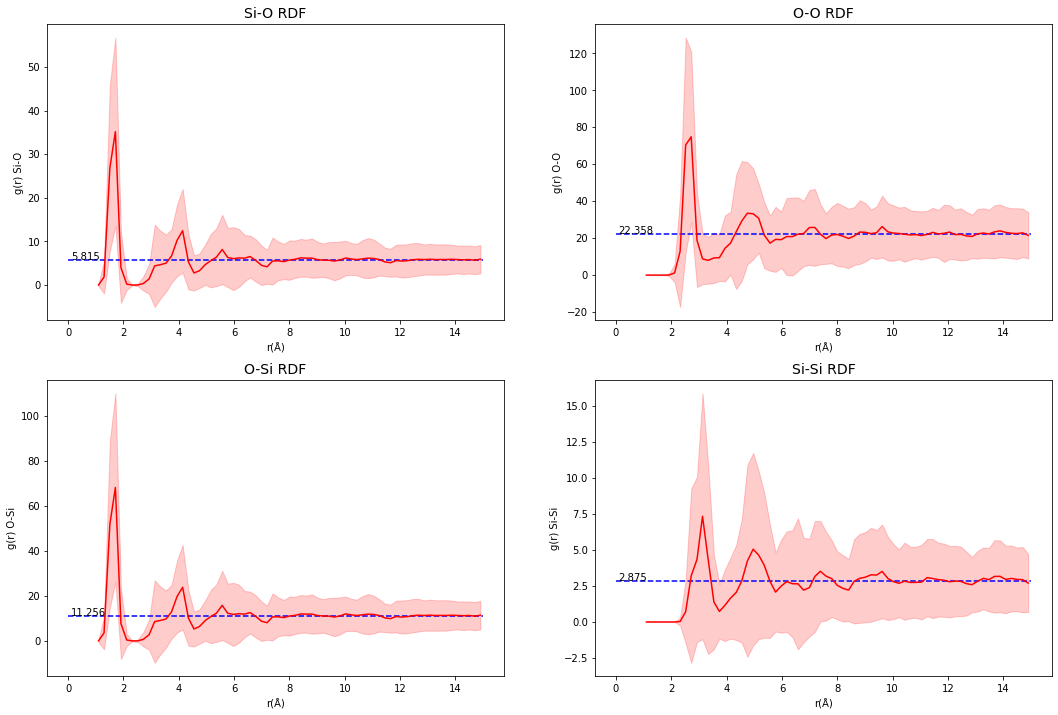

In [60]:
import glob
fig = plt.figure(figsize=(18, 12))
files = glob.glob(f'{csv_path}/*')
structure = ''
for i,file in enumerate(files):
    data = pd.read_csv(file)
    data = data.drop(data.columns[0],axis=1)
    fig = plot_rdf_to_one(data, fig, i+1)
fig.show()
# fig.savefig(f'{output_path}/all_converge.png')

In [61]:
# df = pd.read_csv(files[0])
# df = df.drop(df.columns[0],axis=1)
# df.iloc[:,4:] = df.iloc[:,4:] / (4 * np.pi * 0.2)